In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../../datasets/train.csv')

In [3]:
df = df.drop(['id'], axis=1)

In [4]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [5]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [6]:
df.shape

(76518, 37)

In [7]:
[i for i in df.columns if df[i].isnull().sum() > 0]

[]

In [8]:
[i for i in df.columns if df[i].dtype == 'object']

['Target']

In [9]:
# Label encoding
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

In [10]:
X = df.drop(['Target'], axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape

((61214, 36), (15304, 36))

In [12]:
y_train.shape, y_test.shape

((61214,), (15304,))

In [13]:
type(X_train), type(y_train), type(X_test), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [14]:
n_estimators_num_list = [5, 10, 20, 50, 100, 200, 300, 500, 1000]
prob = []
correct = []

In [15]:
train_accuracy = {}
test_accuracy = {}

In [16]:
# Random Forest
for n_estimators_num in n_estimators_num_list:
    rf = RandomForestClassifier(n_estimators=n_estimators_num, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict_proba(X_train)
    prob.append(y_pred_train[np.arange(len(y_train)), y_train])
    correct.append(y_train == np.argmax(y_pred_train, axis=1))
    y_pred = rf.predict(X_test)
    train_accuracy[n_estimators_num] = accuracy_score(y_train, y_pred_train.argmax(axis=1))
    test_accuracy[n_estimators_num] = accuracy_score(y_test, y_pred)
    print(f'n_estimators: {n_estimators_num}, Train accuracy: {train_accuracy[n_estimators_num]}, Test accuracy: {test_accuracy[n_estimators_num]}')

n_estimators: 5, Train accuracy: 0.9749730453817754, Test accuracy: 0.7918844746471511
n_estimators: 10, Train accuracy: 0.9910804717874996, Test accuracy: 0.8097229482488238
n_estimators: 20, Train accuracy: 0.9972882020452838, Test accuracy: 0.8188055410350236
n_estimators: 50, Train accuracy: 0.9996732773548535, Test accuracy: 0.8265812859383168
n_estimators: 100, Train accuracy: 0.9999836638677426, Test accuracy: 0.8265812859383168
n_estimators: 200, Train accuracy: 1.0, Test accuracy: 0.8296523784631469
n_estimators: 300, Train accuracy: 1.0, Test accuracy: 0.8299790904338735
n_estimators: 500, Train accuracy: 1.0, Test accuracy: 0.8297177208572922
n_estimators: 1000, Train accuracy: 1.0, Test accuracy: 0.8293256664924202


In [17]:
prob = np.array(prob)
correct = np.array(correct)

In [18]:
prob = prob.T
correct = correct.T

In [19]:
mean = np.mean(prob, axis=1)
std = np.std(prob, axis=1)
varibility = std / mean

In [20]:
correctness = np.mean(correct, axis=1)

In [21]:
varibility.shape

(61214,)

In [22]:
correctness.shape

(61214,)

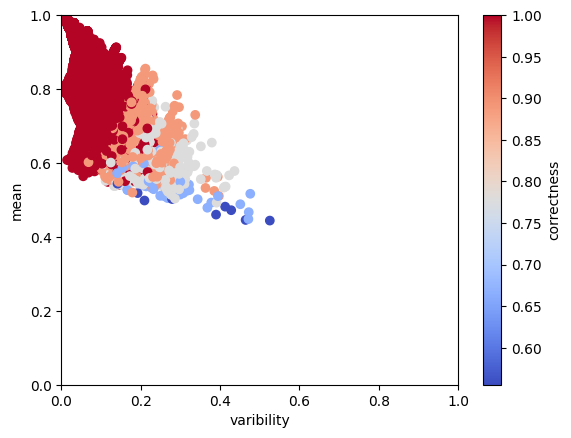

In [23]:
plt.figure()
plt.scatter(varibility, mean, c=correctness, cmap='coolwarm')
plt.colorbar(label = 'correctness')
plt.xlabel('varibility')
plt.ylabel('mean')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [24]:
correctness_min, correctness_max = np.min(correctness), np.max(correctness)

In [25]:
# pick range
correctness_range = [[min_i, min_i + 0.1] for min_i in np.arange(correctness_min, 1.1, 0.1)]
correctness_range

[[0.5555555555555556, 0.6555555555555556],
 [0.6555555555555556, 0.7555555555555555],
 [0.7555555555555555, 0.8555555555555555],
 [0.8555555555555555, 0.9555555555555555],
 [0.9555555555555555, 1.0555555555555556],
 [1.0555555555555554, 1.1555555555555554]]

In [26]:
pick = []
for j in range(len(correctness_range)):
    pick.append([idx for idx,i in enumerate(correctness) if correctness_range[j][0] <= i < correctness_range[j][1]])

In [27]:
pick_train_x = []
pick_train_y = []
for i in pick:
    pick_train_x.append(X_train.iloc[i, :])
    pick_train_y.append(y_train.iloc[i])

In [28]:
def decrease_n_estimators(index: int) -> int:
    base = 300  # 可以設定一個基礎數值
    return max(10, base - index * 20)  # 確保 n_estimators 不會小於某個最小值，例如 10

In [29]:
model_list = []
for I in range(len(pick_train_x)):
    # 創建和訓練隨機森林模型
    rf = RandomForestClassifier(n_estimators=decrease_n_estimators(I), random_state=42, n_jobs=-1)
    print(f"Training model {I}")
    print(f"Training data shape: {pick_train_x[I].shape}, {pick_train_y[I].shape}")
    if len(pick_train_x[I]) == 0:
        continue
    rf.fit(pick_train_x[I], pick_train_y[I])
    model_list.append(rf)

print(f"Total models trained: {len(model_list)}")

Training model 0
Training data shape: (9, 36), (9,)
Training model 1
Training data shape: (64, 36), (64,)
Training model 2
Training data shape: (334, 36), (334,)
Training model 3
Training data shape: (1369, 36), (1369,)
Training model 4
Training data shape: (59438, 36), (59438,)
Training model 5
Training data shape: (0, 36), (0,)
Total models trained: 5


In [30]:
# Ensemble
from sklearn.ensemble import VotingClassifier
from rich import print as rprint

model_list = [(f'model_{i}', model_list[i]) for i in range(len(model_list))]
rprint(model_list)

vc = VotingClassifier(estimators=model_list, voting='soft')
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print(f'Ensemble accuracy: {accuracy_score(y_test, y_pred)}')

[
    ('model_0', RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)),
    ('model_1', RandomForestClassifier(n_estimators=280, n_jobs=-1, random_state=42)),
    ('model_2', RandomForestClassifier(n_estimators=260, n_jobs=-1, random_state=42)),
    ('model_3', RandomForestClassifier(n_estimators=240, n_jobs=-1, random_state=42)),
    ('model_4', RandomForestClassifier(n_estimators=220, n_jobs=-1, random_state=42))
]

Ensemble accuracy: 0.8300444328280188


In [31]:
vc

VotingClassifier(estimators=[('model_0',
                              RandomForestClassifier(n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('model_1',
                              RandomForestClassifier(n_estimators=280,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('model_2',
                              RandomForestClassifier(n_estimators=260,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('model_3',
                              RandomForestClassifier(n_estimators=240,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('model_4',
                              RandomForestClassifier(n_estimators=220,
                                                     n_jobs=-1,
                                                     random_state=42))],
                 voting='soft')

In [32]:
train_accuracy["Voting"] = accuracy_score(y_train, vc.predict(X_train))
test_accuracy["Voting"] = accuracy_score(y_test, y_pred)

In [37]:
rprint(train_accuracy)

{
    5: 0.9749730453817754,
    10: 0.9910804717874996,
    20: 0.9972882020452838,
    50: 0.9996732773548535,
    100: 0.9999836638677426,
    200: 1.0,
    300: 1.0,
    500: 1.0,
    1000: 1.0,
    'Voting': 1.0
}

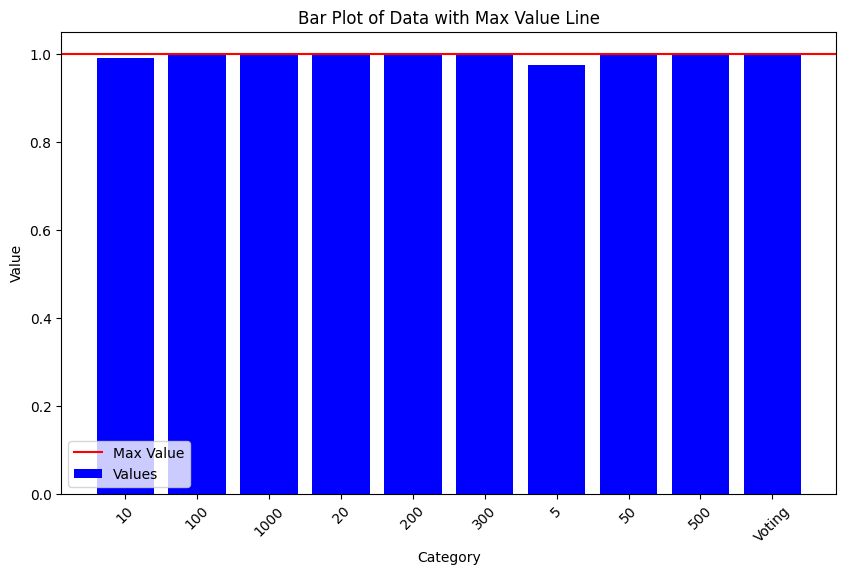

In [40]:
# plot

# Sorting the data for better visualization
keys = sorted(train_accuracy.keys(), key=lambda x: str(x))
values = [train_accuracy[key] for key in keys]
max_value = max(values)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(range(len(train_accuracy)), values, color='blue', label='Values')
plt.axhline(y=max_value, color='r', linestyle='-', label='Max Value')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Model Train Accuracy')
plt.xticks(range(len(train_accuracy)), keys, rotation=45)
plt.legend()
plt.show()


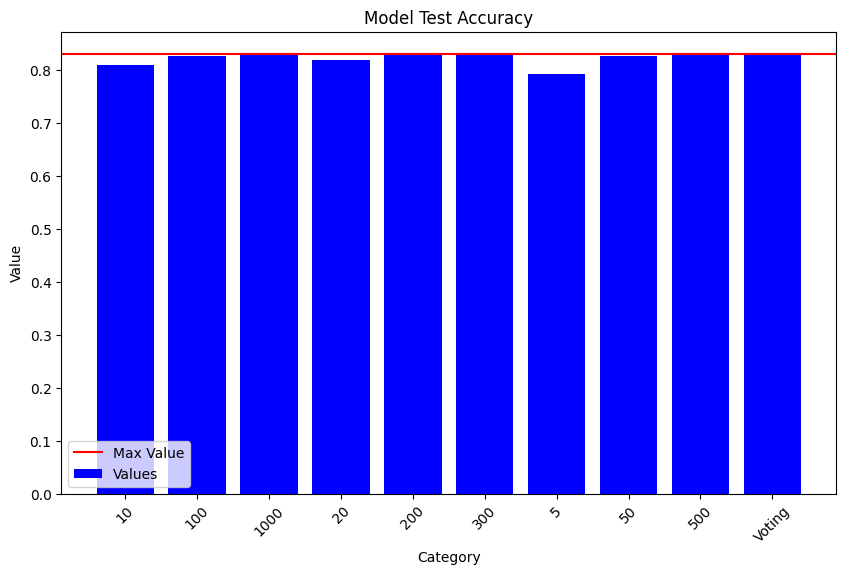

In [41]:
keys = sorted(test_accuracy.keys(), key=lambda x: str(x))
values = [test_accuracy[key] for key in keys]
max_value = max(values)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(range(len(test_accuracy)), values, color='blue', label='Values')
plt.axhline(y=max_value, color='r', linestyle='-', label='Max Value')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Model Test Accuracy')
plt.xticks(range(len(test_accuracy)), keys, rotation=45)
plt.legend()
plt.show()